# Heart Disease Predection Using Machine Learning Algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\janga\\Desktop\\Code'

In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

In [10]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [11]:
y = data["target"]

1    165
0    138
Name: target, dtype: int64


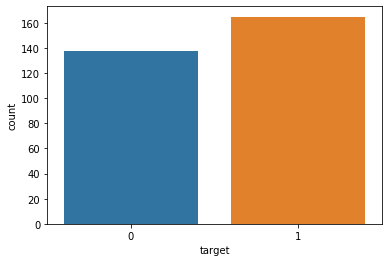

In [12]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

In [13]:
data["sex"].unique()

array([1, 0], dtype=int64)

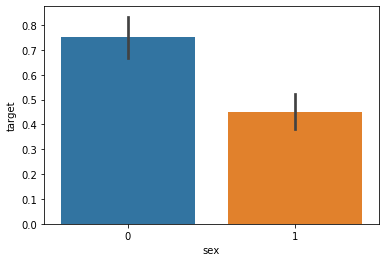

In [14]:
sns.barplot(data["sex"],data["target"])

In [15]:
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

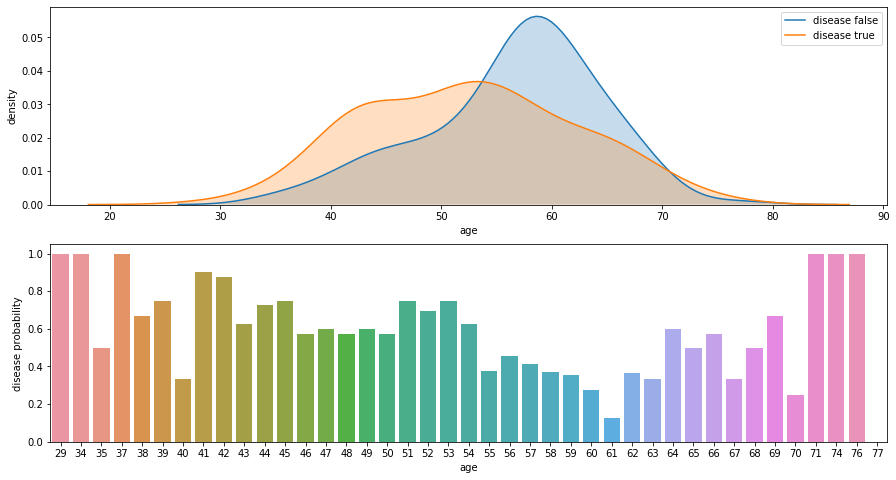

<Figure size 216x216 with 0 Axes>

In [16]:
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plotAge()

In [17]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [18]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [19]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [20]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


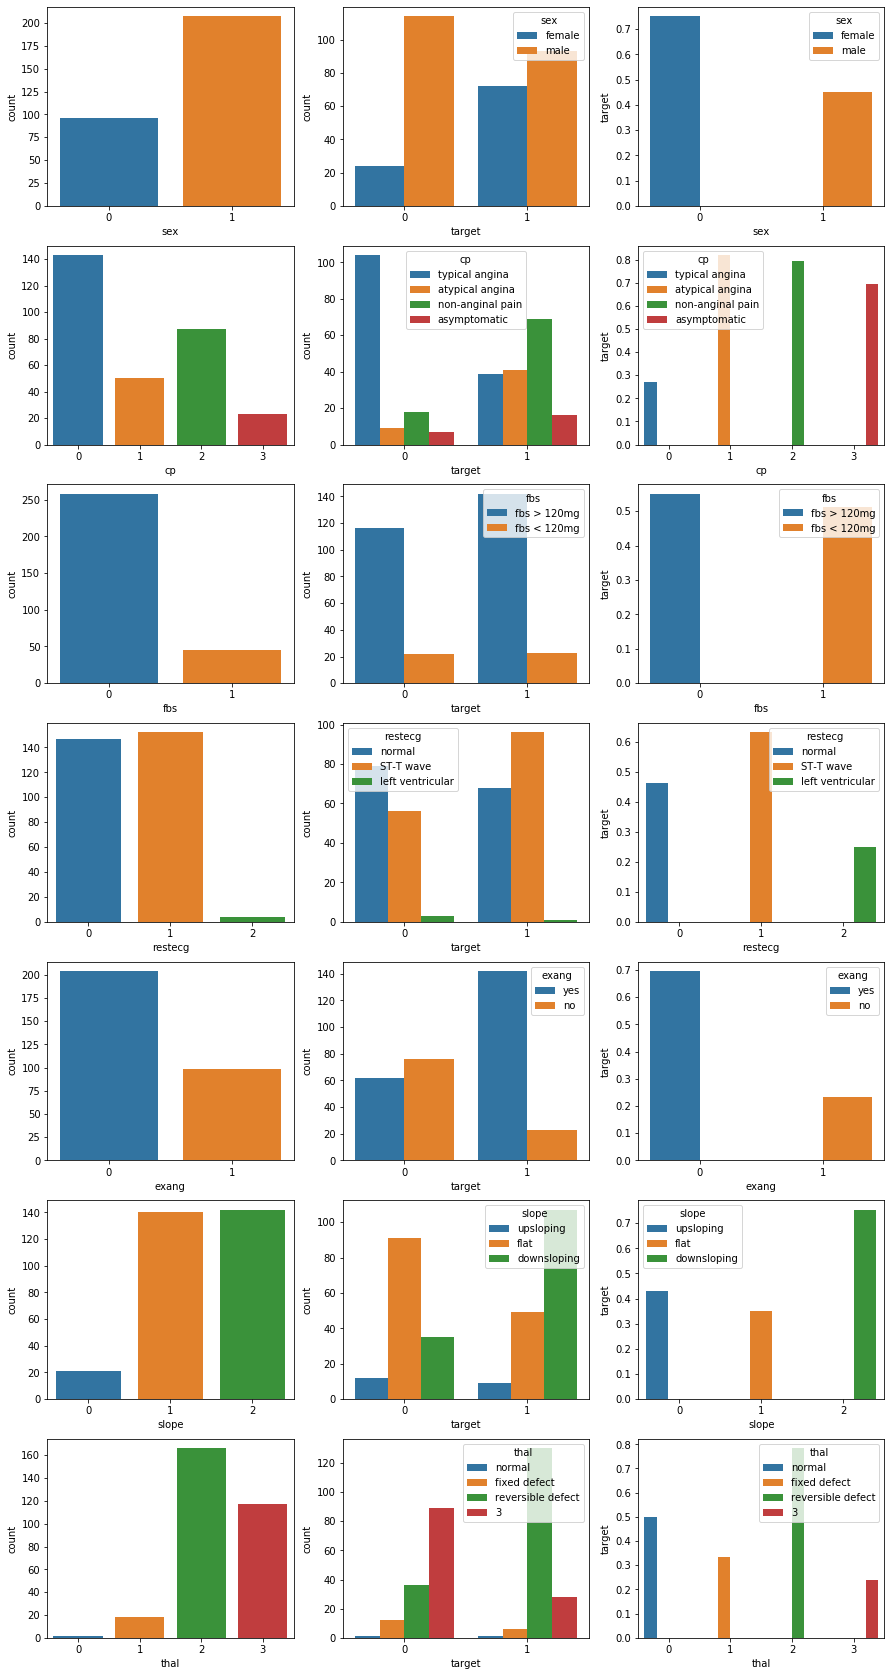

In [21]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [22]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [23]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

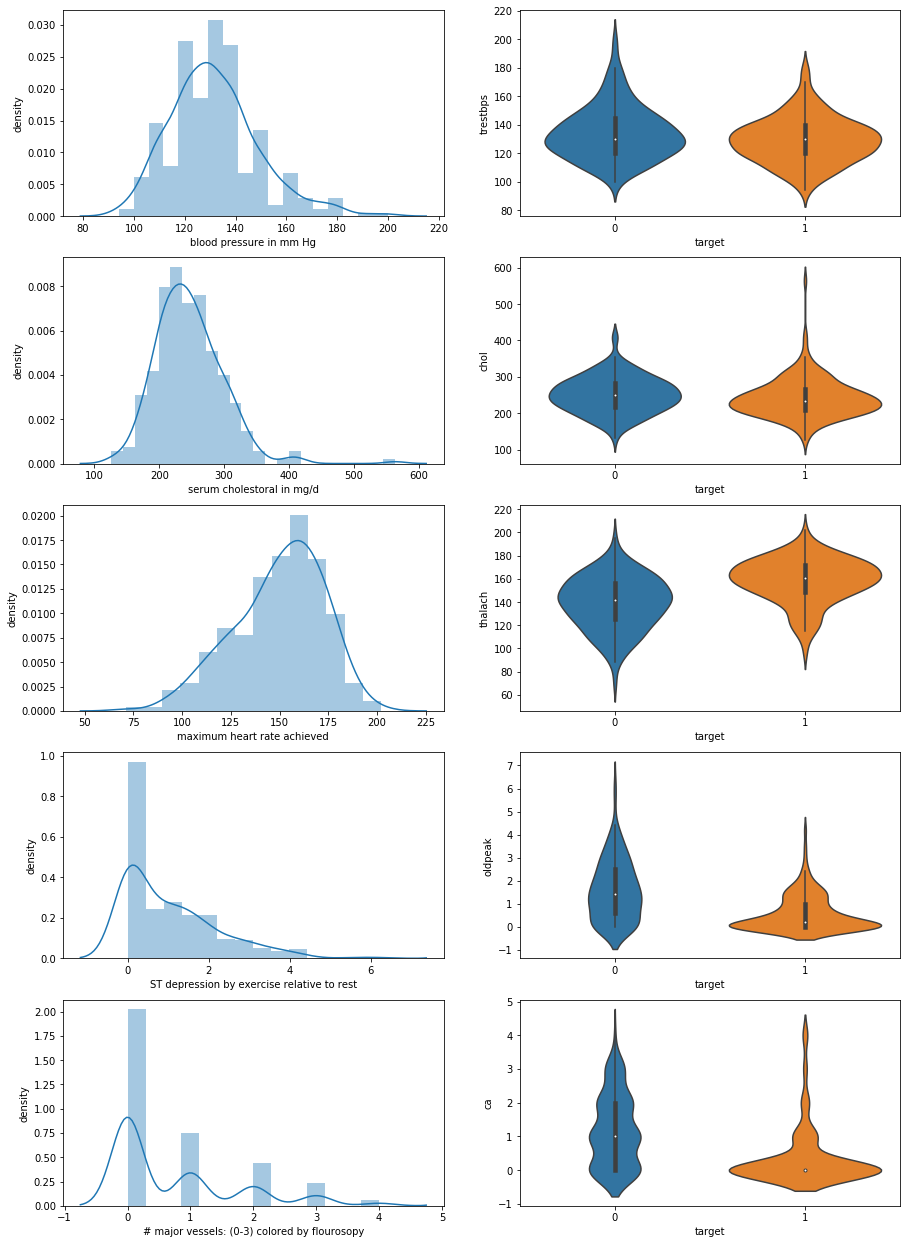

In [24]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

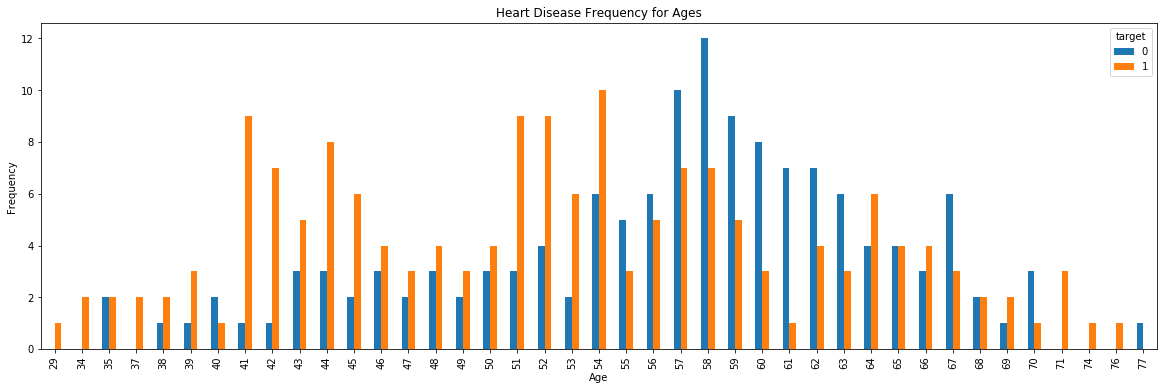

In [25]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

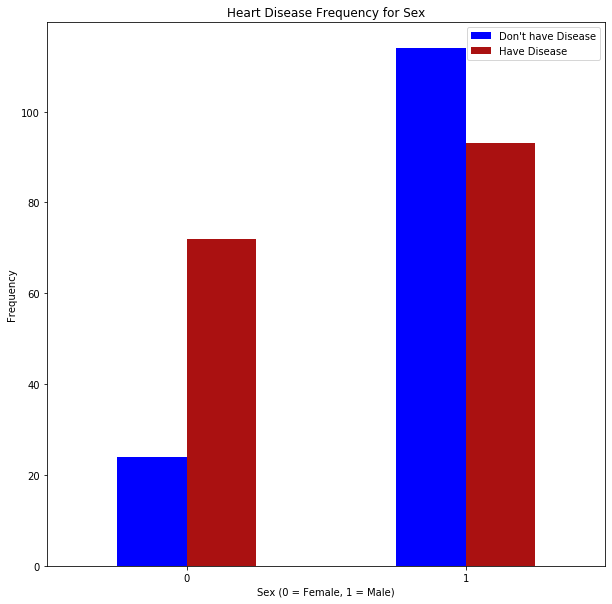

In [26]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

run this line after prediction

In [27]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [28]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


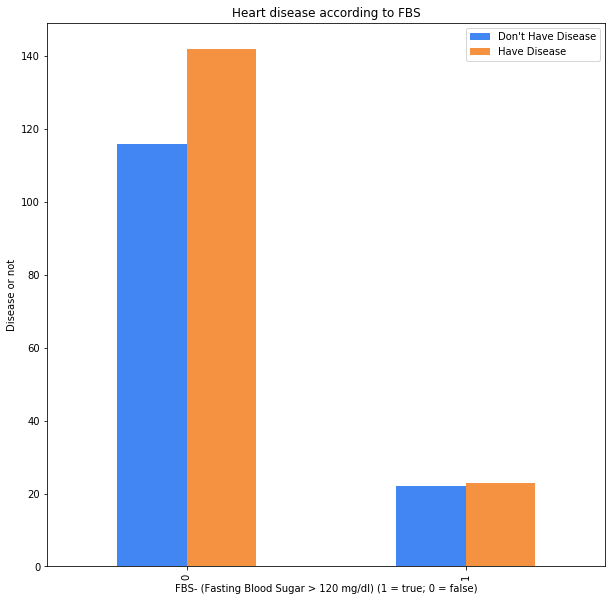

In [29]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(10,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [30]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

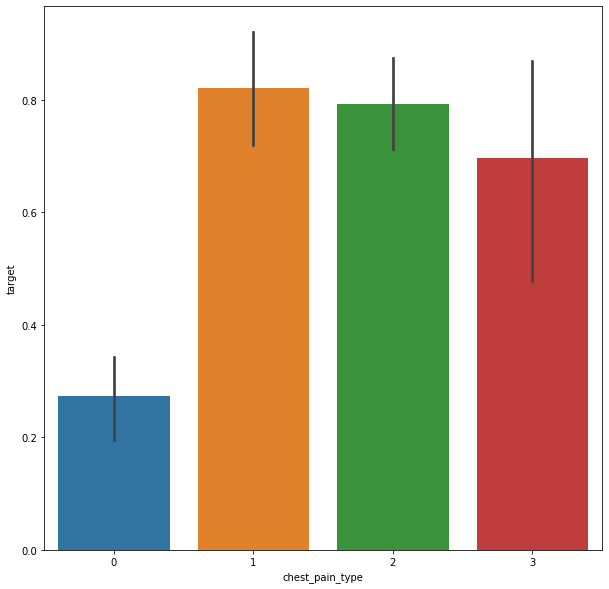

In [31]:
plt.figure(figsize=(10, 10))
sns.barplot(data["chest_pain_type"],y)

In [32]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

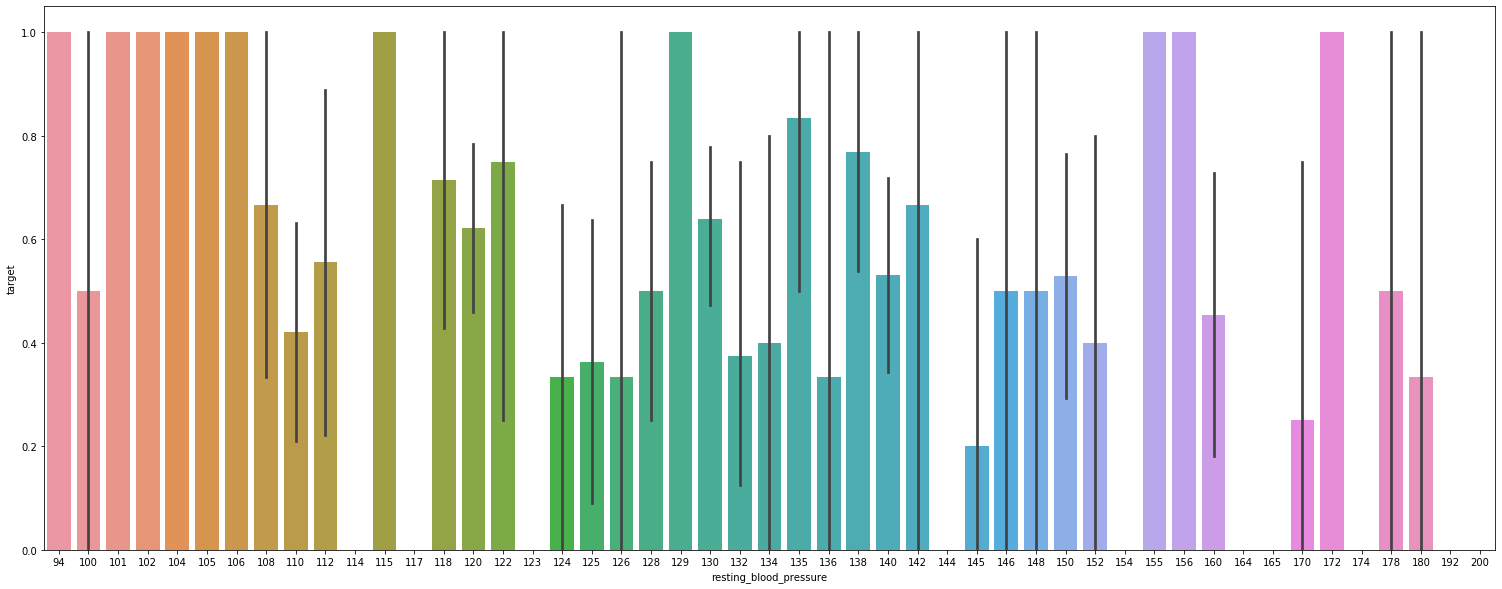

In [33]:
plt.figure(figsize=(26, 10))
sns.barplot(data["resting_blood_pressure"],y)

In [34]:
data["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

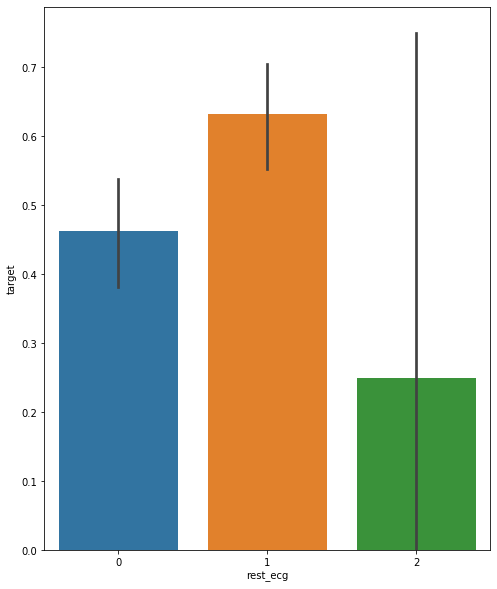

In [35]:
plt.figure(figsize=(8, 10))
sns.barplot(data["rest_ecg"],y)

In [36]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

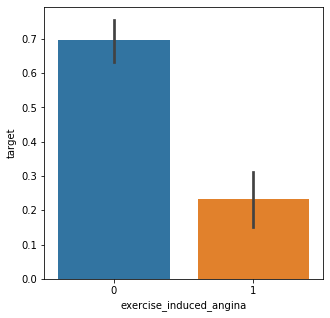

In [37]:
plt.figure(figsize=(5, 5))
sns.barplot(data["exercise_induced_angina"],y)

In [38]:
data["st_slope"].unique()

array([0, 2, 1], dtype=int64)

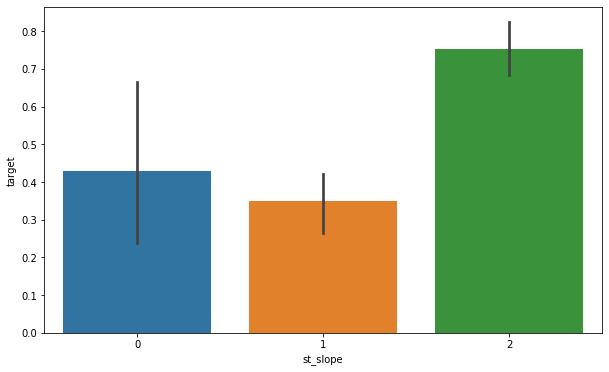

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data["st_slope"],y)

In [40]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### count num_major vessels

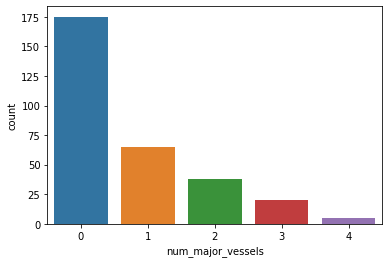

In [41]:
sns.countplot(data["num_major_vessels"])

### comparing with target

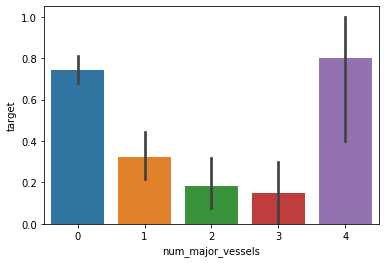

In [42]:
sns.barplot(data["num_major_vessels"],y)

In [43]:
data["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

### plotting the thalassemia distribution (0,1,2,3)

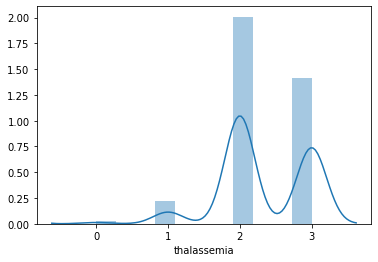

In [44]:
sns.distplot(data["thalassemia"])

### comparing with target

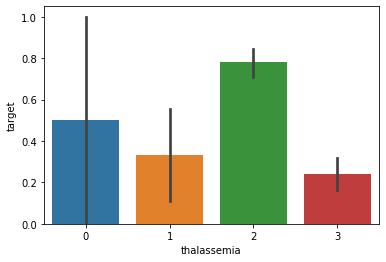

In [45]:
sns.barplot(data["thalassemia"],y)

# thalassemia and cholesterol scatterplot

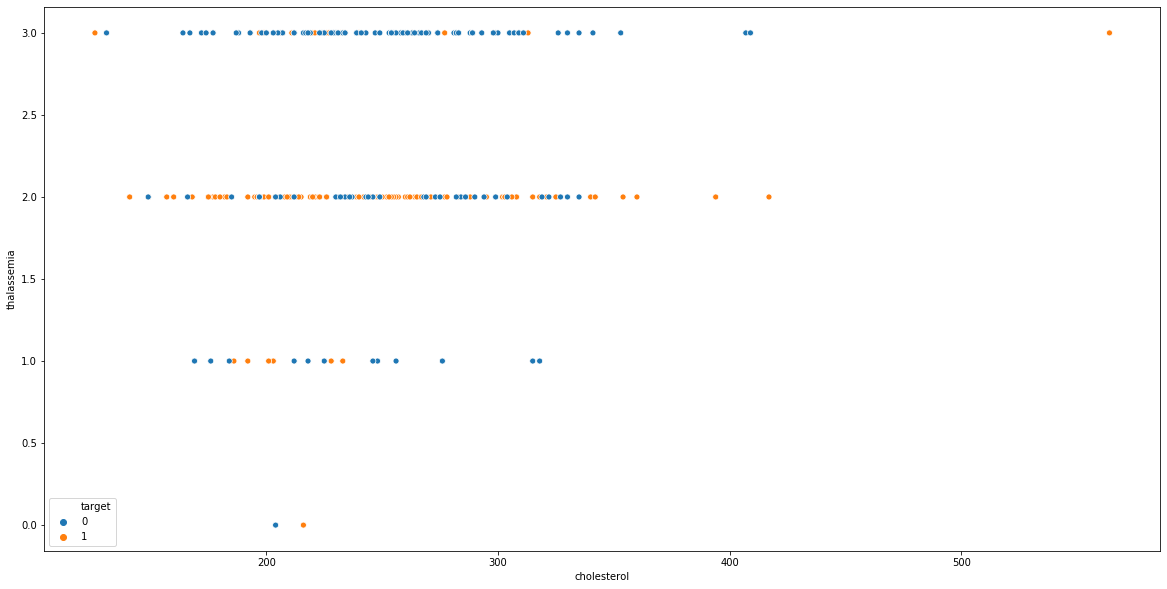

In [46]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

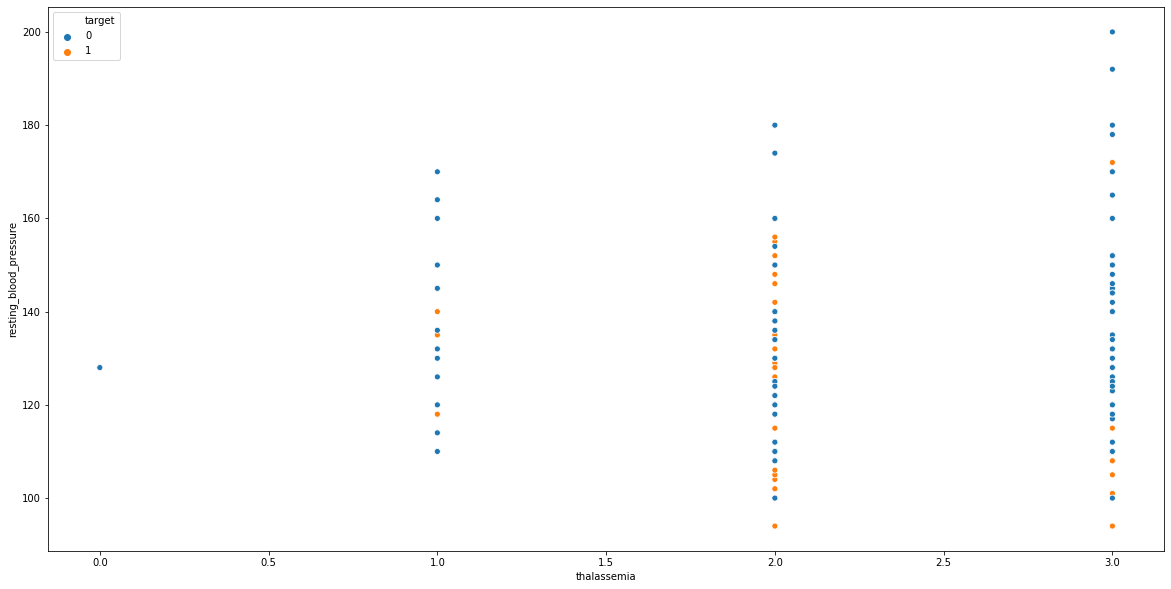

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

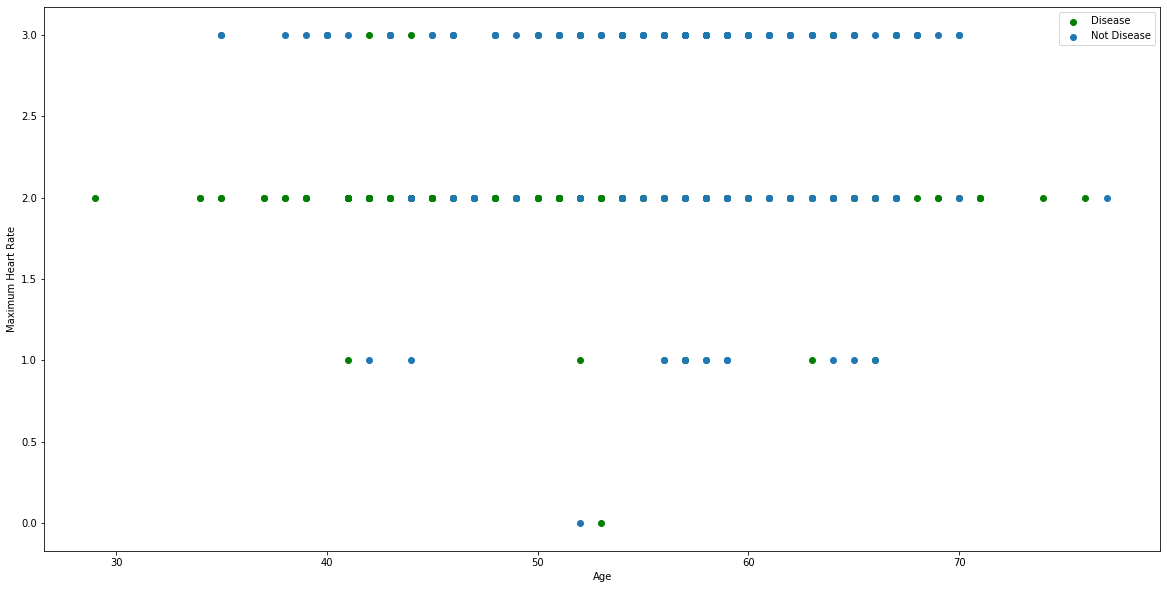

In [48]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

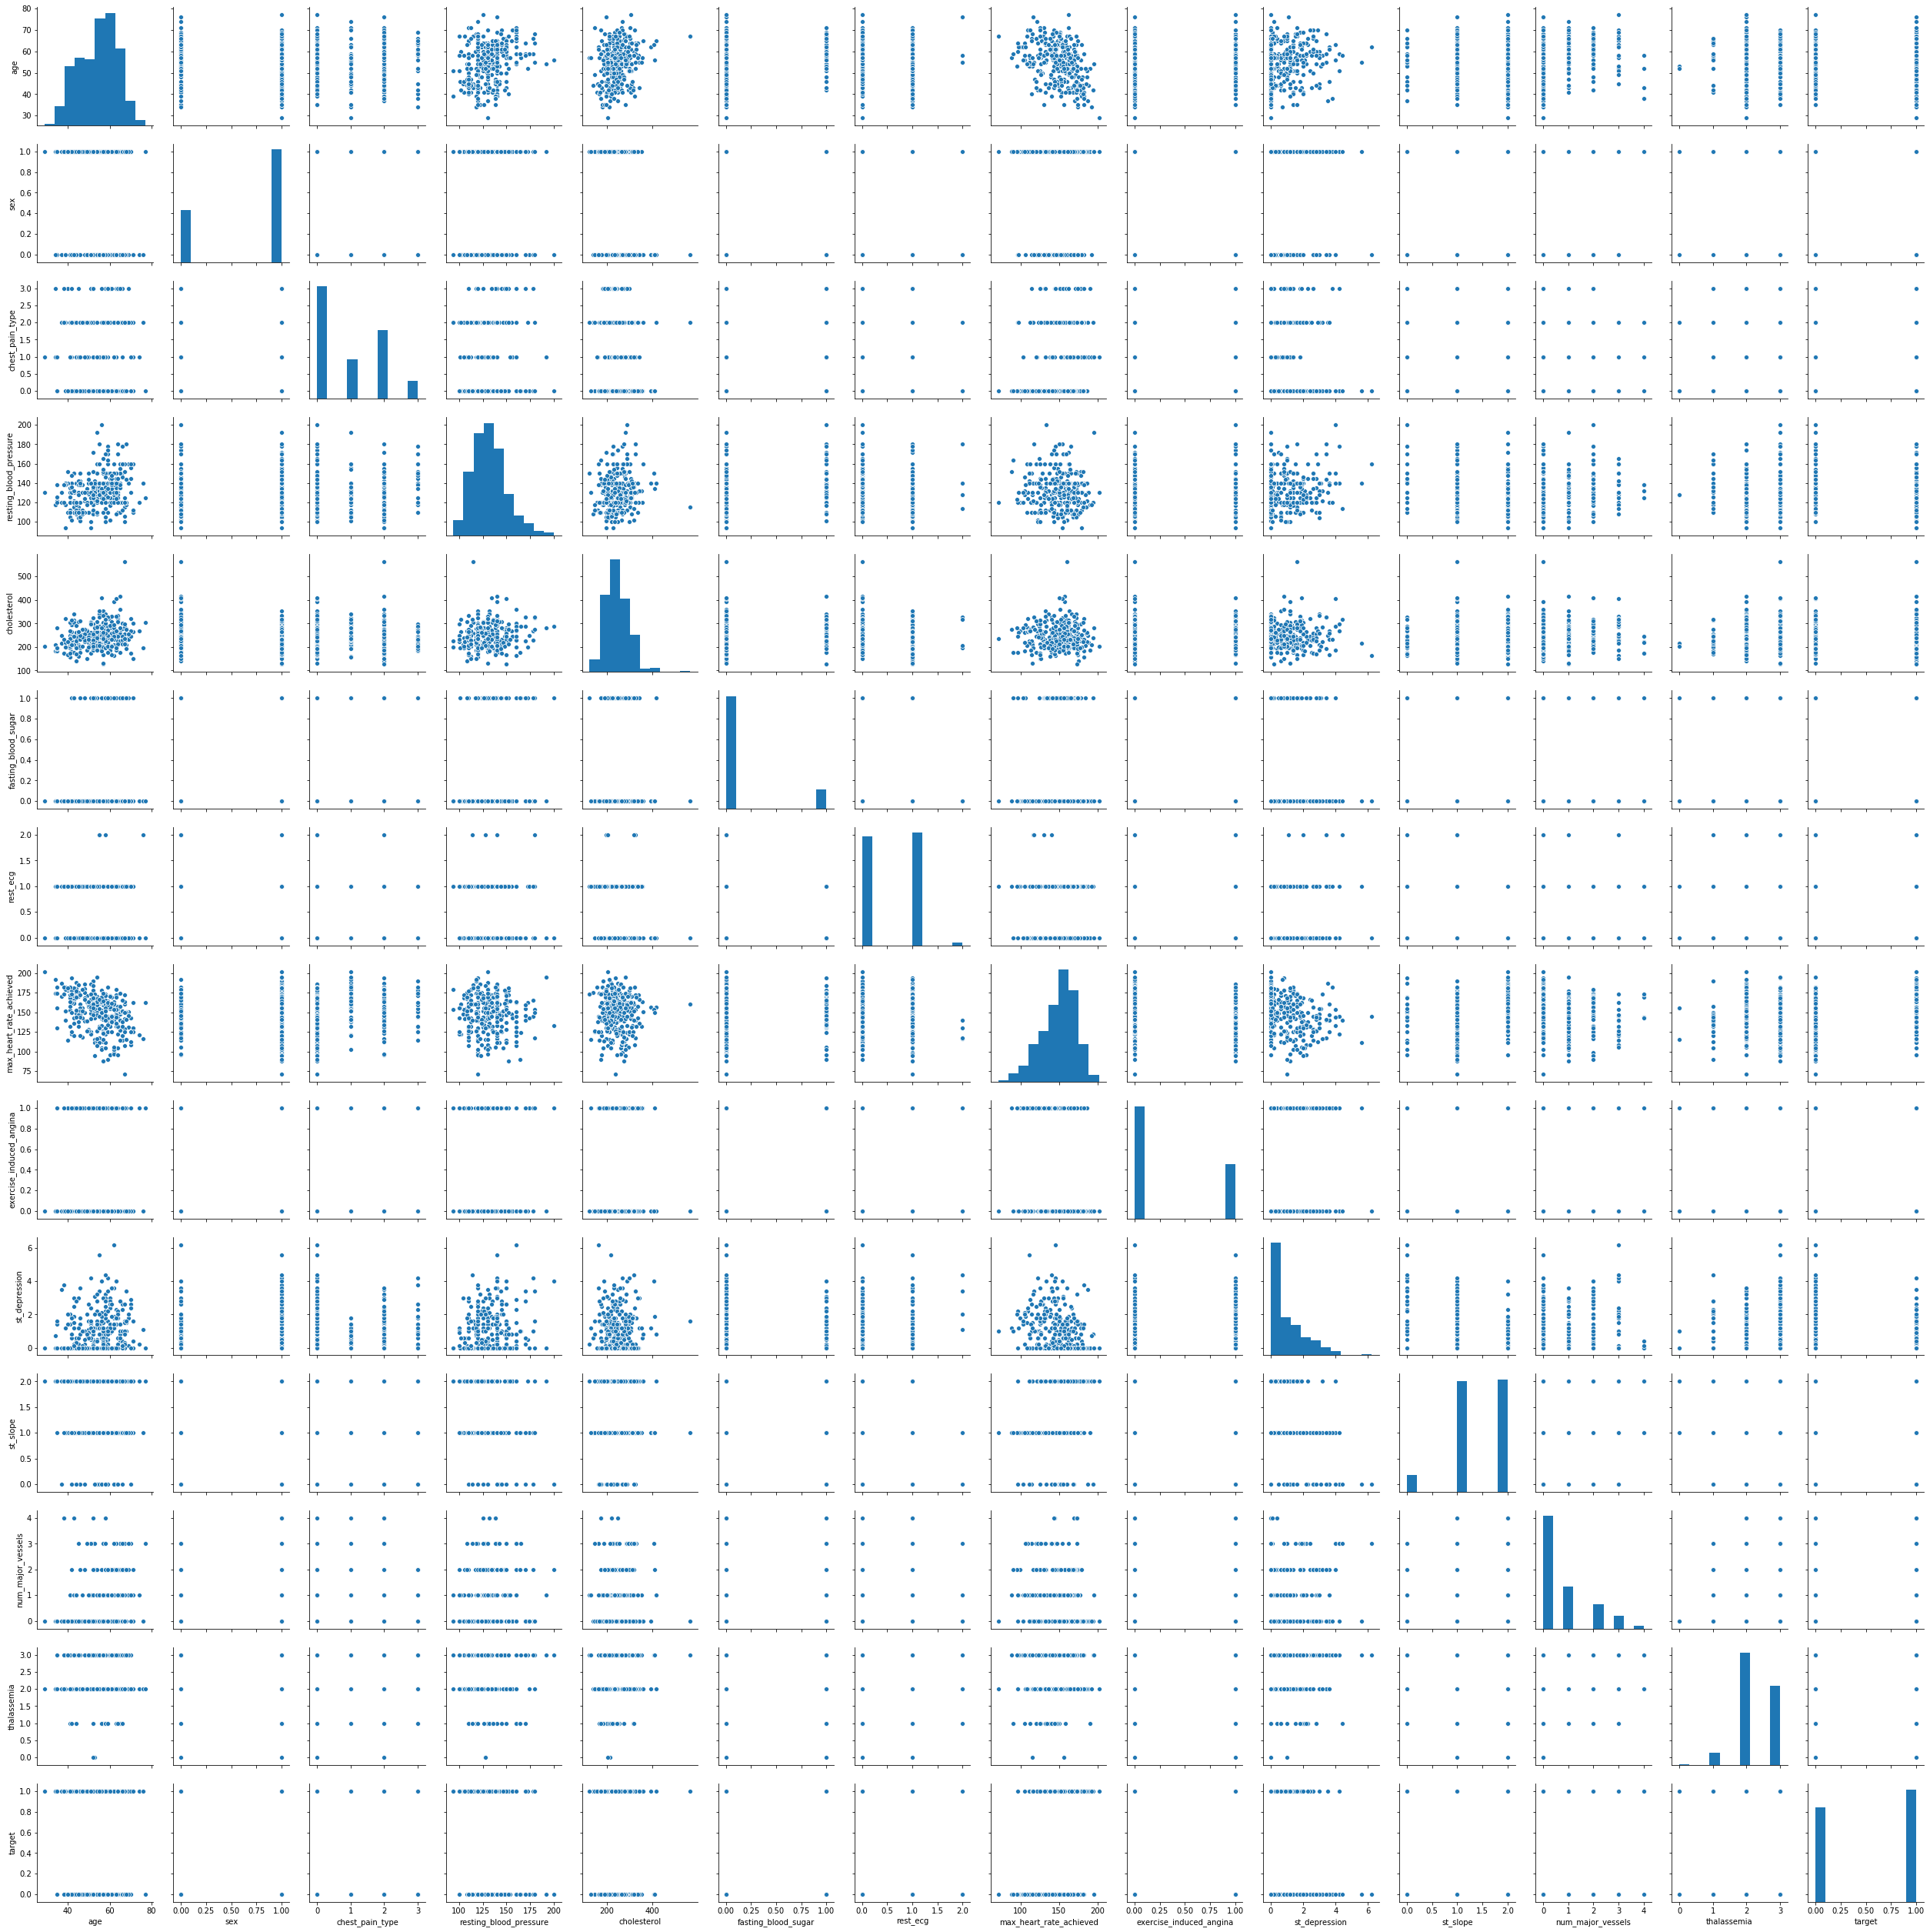

In [49]:
sns.pairplot(data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002360AFF9F08>,
      dtype=object)

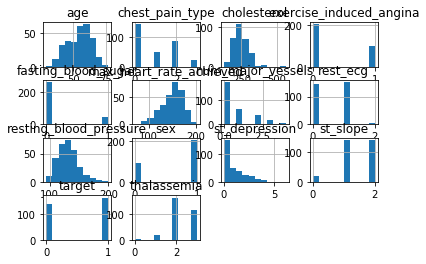

In [50]:
data.hist()

# Correlation plot

In [51]:
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

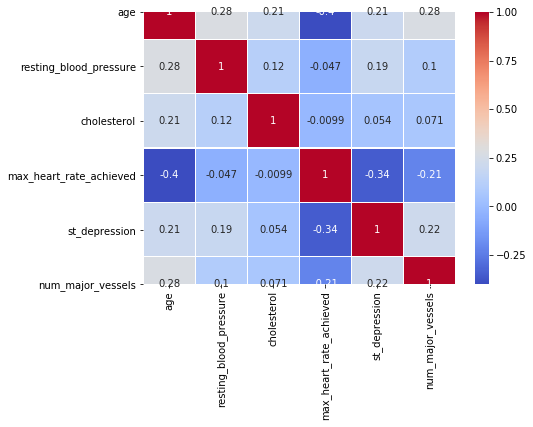

In [52]:
f, ax = plt.subplots(figsize=(7, 5))
df_corr = data.loc[:,cnames]
corr = df_corr.corr()
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [53]:
df_corr = data.loc[:,cnames]
#df_corr

## Splitting the dataset to Train and Test

In [54]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=2)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [55]:
X_train.shape

(242, 13)

In [56]:
X_test.shape

(61, 13)

In [57]:
Y_train.shape

(242,)

In [58]:
Y_test.shape

(61,)

## Logistic regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)

In [60]:
logistic_accuracy=accuracy_score(Y_test, pred_lr)
logistic_accuracy

0.9016393442622951

### Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
matrix= confusion_matrix(Y_test, pred_lr)

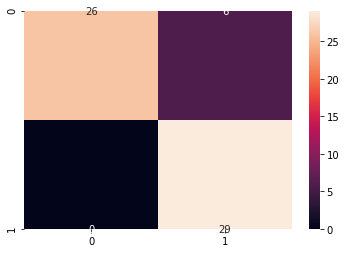

In [63]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision score

In [64]:
from sklearn.metrics import precision_score

In [65]:
precision = precision_score(Y_test, pred_lr)

In [66]:
print("Precision: ",precision)

Precision:  0.8285714285714286


### Recall

In [67]:
from sklearn.metrics import recall_score

In [68]:
recall = recall_score(Y_test, pred_lr)

In [69]:
print("Recall is: ",recall)

Recall is:  1.0


### F-Score

In [70]:
print((2*precision*recall)/(precision+recall))

0.90625


### classification_report

In [71]:
print(classification_report(Y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
predrf = rf.predict(X_test)
print(predrf)

[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1]


In [73]:
Randomforest_accuracy=accuracy_score(Y_test, predrf)
Randomforest_accuracy

0.9016393442622951

In [74]:
print(classification_report(Y_test, predrf))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



### confusion matrix of Random Forest

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
matrix= confusion_matrix(Y_test, predrf)

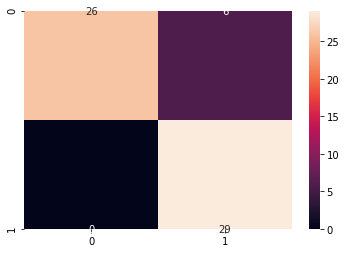

In [77]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision score

In [78]:
from sklearn.metrics import precision_score

In [79]:
precision = precision_score(Y_test, predrf)

In [80]:
print("Precision: ",precision)

Precision:  0.8285714285714286


### recall

In [81]:
from sklearn.metrics import recall_score

In [82]:
recall = recall_score(Y_test, predrf)

In [83]:
print("Recall is: ",recall)

Recall is:  1.0


### F score

In [84]:
print((2*precision*recall)/(precision+recall))

0.90625


## Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB( )
nb.fit(X_train, Y_train)
prednb = nb.predict(X_test)
print(prednb)

[1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0]


In [86]:
Naivebayes_accuracy=accuracy_score(Y_test, prednb)
Naivebayes_accuracy

0.8852459016393442

In [87]:
print(classification_report(Y_test, prednb))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
matrix= confusion_matrix(Y_test, prednb)

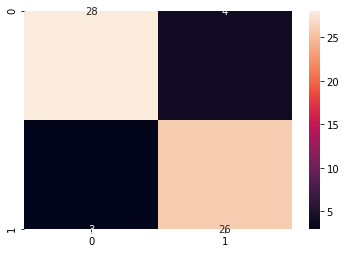

In [90]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision score

In [91]:
from sklearn.metrics import precision_score

In [92]:
precision = precision_score(Y_test, prednb)

In [93]:
print("Precision: ",precision)

Precision:  0.8666666666666667


### recall

In [94]:
from sklearn.metrics import recall_score

In [95]:
recall = recall_score(Y_test, prednb)

In [96]:
print("Recall is: ",recall)

Recall is:  0.896551724137931


In [97]:
print((2*precision*recall)/(precision+recall))

0.8813559322033899


## KNN(K Nearest Neighbors)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
print(predknn)

[1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1]


In [99]:
knn_accuracy=accuracy_score(Y_test, predknn)
knn_accuracy

0.7377049180327869

In [100]:
print(classification_report(Y_test, predknn))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.71      0.76      0.73        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [101]:
score_knn = round(accuracy_score(predknn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.77 %


### Confusion matrix

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
matrix= confusion_matrix(Y_test, predknn)

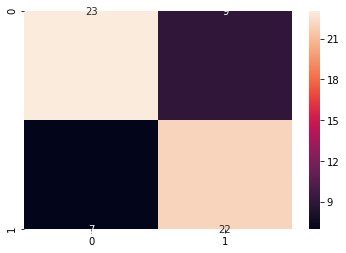

In [104]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision score

In [105]:
from sklearn.metrics import precision_score

In [106]:
precision = precision_score(Y_test, predknn)

In [107]:
print("Precision: ",precision)

Precision:  0.7096774193548387


### recall

In [108]:
from sklearn.metrics import recall_score

In [109]:
recall = recall_score(Y_test, predknn)

In [110]:
print("Recall is: ",recall)

Recall is:  0.7586206896551724


### f score

In [111]:
print((2*precision*recall)/(precision+recall))

0.7333333333333333


## Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, Y_train)
preddc = dt.predict(X_test)
print(preddc)

[1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0]


In [113]:
Dt_accuracy=accuracy_score(Y_test, preddc)
Dt_accuracy

0.8032786885245902

In [114]:
print(classification_report(Y_test, preddc))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### Confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
matrix= confusion_matrix(Y_test, preddc)

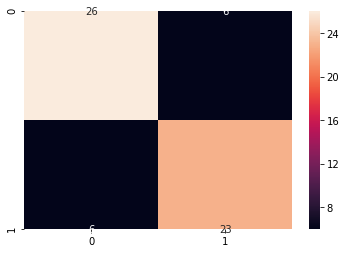

In [117]:
sns.heatmap(matrix,annot = True, fmt = "d")

### precision score

In [118]:
from sklearn.metrics import precision_score

In [119]:
precision = precision_score(Y_test, preddc)

In [120]:
print("Precision: ",precision)

Precision:  0.7931034482758621


### recall

In [121]:
from sklearn.metrics import recall_score

In [122]:
recall = recall_score(Y_test, preddc)

In [123]:
print("Recall is: ",recall)

Recall is:  0.7931034482758621


### f score

In [124]:
print((2*precision*recall)/(precision+recall))

0.7931034482758621
